# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1,2,3]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,6353,8808,7684,2405,3516,7844
2,13265,1196,4221,6404,507,1788


In [4]:
#Mean and  Median (50%) Values of the data set is appended to the sample dataframe
samples_bar = samples.append(data.describe().loc['mean'])
samples_bar = samples_bar.append(data.describe().loc['75%'])
samples_bar = samples_bar.append(data.describe().loc['50%'])
samples_bar = samples_bar.append(data.describe().loc['25%'])


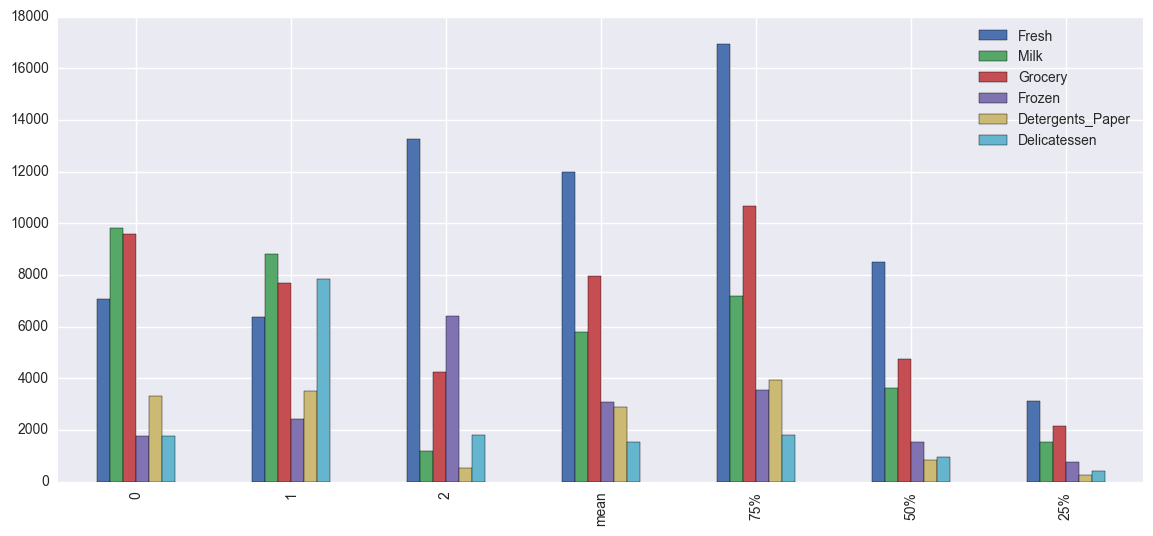

In [5]:
samples_bar.plot(kind='bar', figsize=(14,6))


In [6]:
data.median()

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

In [7]:
samples_bar

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057.000000,9810.000000,9568.000000,1762.000000,3293.000000,1776.000000
1,6353.000000,8808.000000,7684.000000,2405.000000,3516.000000,7844.000000
2,13265.000000,1196.000000,4221.000000,6404.000000,507.000000,1788.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Based on the Mean and Median values obtained for the data set, we see that the Mean values of each of the features is greater than the median values, which indicates that distribution is skewed to the right.

Looking at the data of Customer Id 0, 

The customer spending on Fresh produce was below the mean, but above the median. Similarly the customer spending on Frozen products was below the mean and above median. But the customer spent more than the mean and the median on Milk, Grocery, Detergents and Deli. Grocery, Detergents and Deli was closer to the 75% percentile. Milk purchase was above the 75% percentile. Looking at the spending of this customer we see the spending was more on Milk, Grocery, Detergents and Deli. Based on this spending pattern one can assume that this customer is probably a restaurant.

Looking at the data of Customer Id 1, 

The customer spending on Fresh produce was below the mean and the median. The customer spent more than the mean and the median on Milk, Detergents and Deli. Grocery and Frozen products spending was less than the mean but above the median. Detergents and Deli were closer to the 75% percentile. Milk purchase was above the 75% percentile. Grocery spending was below the mean but above the median. Looking at the spending of this customer we see the spending was more on Milk, Detergents and Deli. Based on this spending pattern one can assume that this customer is probably a coffee shop.

Looking at the data of Customer Id 2, 

The customer spending on Fresh produce and Frozen products was above the mean and the median. The customer spent below the mean and the median on Milk, Grocery and Detergents. As with respect to Deli the customer spent above mean and above the median value. Looking at the spending of this customer we see the spending was more on Fresh Produce, Frozen and Deli . Based on this spending pattern one can assume that this customer is probably a super market with a food court attached to it.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [8]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
from sklearn import cross_validation

target_col=data.columns[data.columns.get_loc('Frozen')]
print target_col

The scikit-learn version is 0.18.1.
Frozen


C:\Users\aw634c\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery',axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
# Used Stratified Shuffle to split the data
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn import cross_validation
# Extract feature (X) and target (y) columns
feature_cols = list(new_data.columns)  # all columns of the new data Frame
target_col = data.columns[data.columns.get_loc('Grocery')]  # last column is the target/label

X_all = new_data[feature_cols]
y_all = data[target_col]
#splitGen = StratifiedShuffleSplit(y=y_all,n_iter=3,train_size=0.75,test_size=0.25,random_state=42)

#train_index, test_index = next(iter(splitGen))

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, test_size=0.25, random_state=42)
# TODO: Create a decision tree regressor and fit it to the training set
from sklearn import tree
regressor = tree.DecisionTreeRegressor()
clf=regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = clf.score(X_test,y_test)

print score

0.711667759052


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I attempted to remove the grocery feature vector.
The reported score was 0.71. This feature might not be required to predict customer spending habits as grocery being a broad term would include everything from Fresh produce, milk, frozen products and any other household item. So we could drop this feature from our data set.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

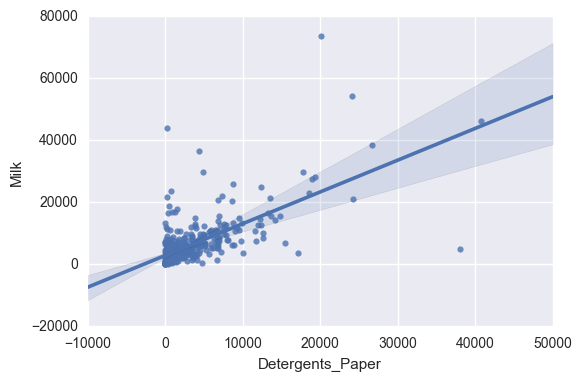

In [10]:
sns.regplot(x='Detergents_Paper',y='Milk', data=data)

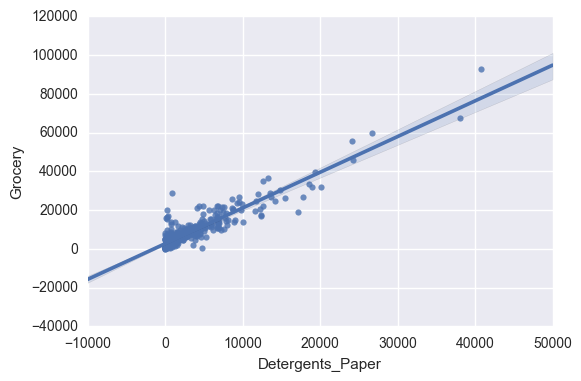

In [11]:
sns.regplot(x='Detergents_Paper',y='Grocery', data=data)

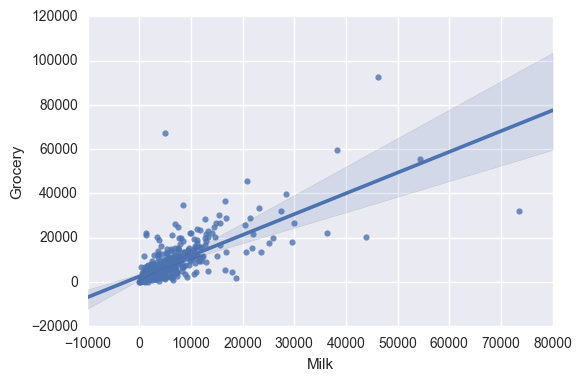

In [12]:
sns.regplot(x='Milk',y='Grocery', data=data)

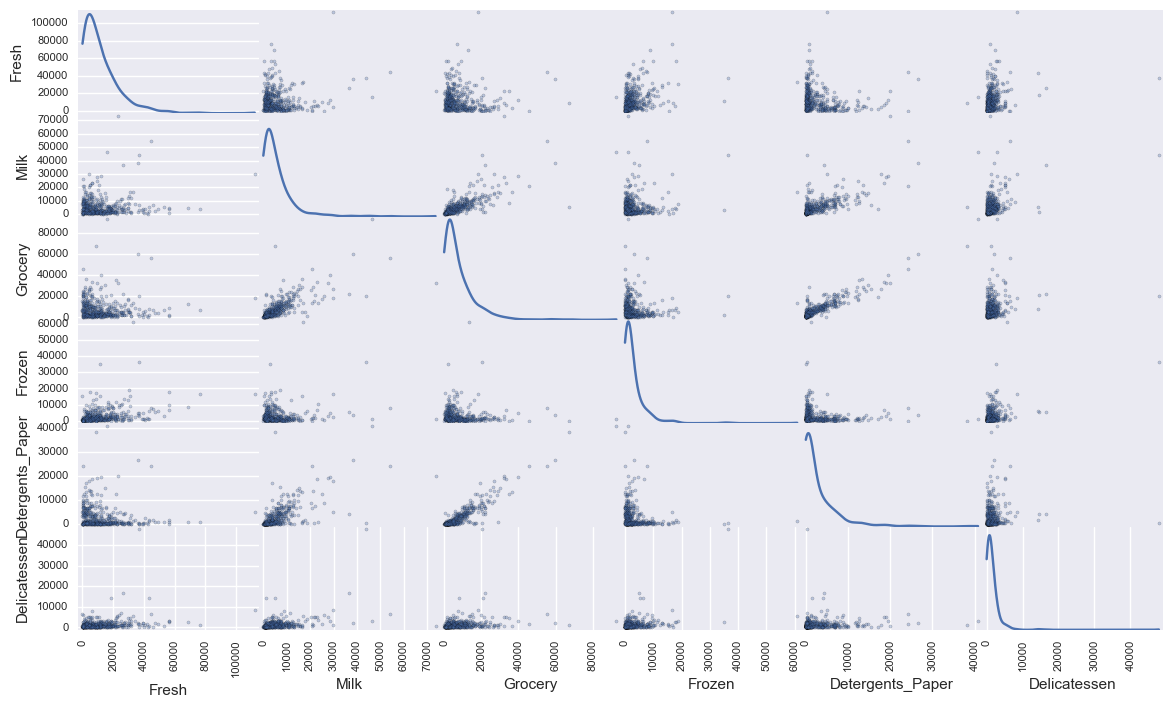

In [13]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

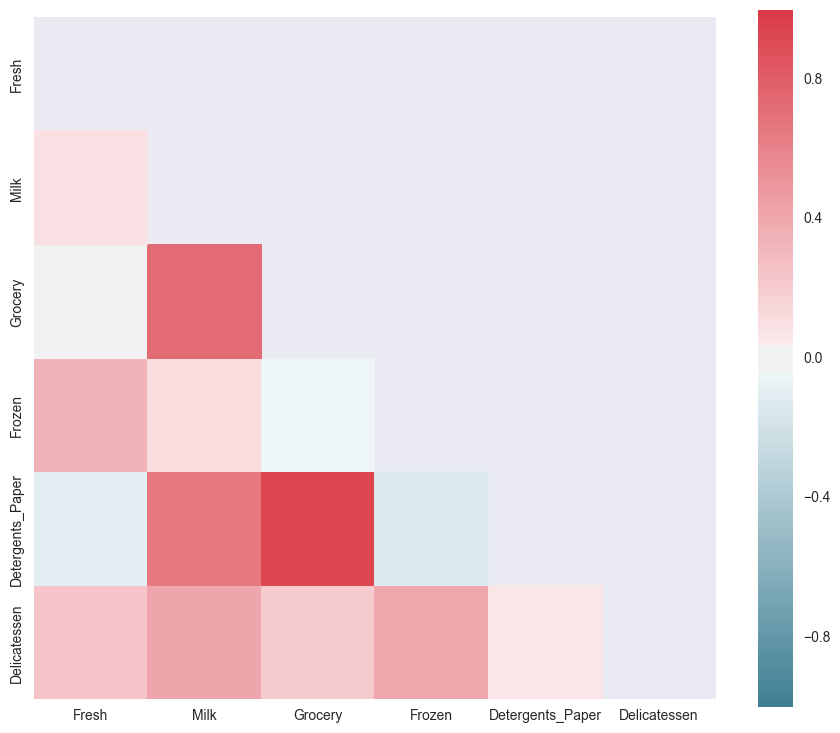

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
#Compute the correlation Matrix
corrData= data.corr()
#Generate a mask of the upper Triangle
mask = np.zeros_like(corrData, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrData,mask=mask,cmap=cmap, square=True, ax=ax)

In [15]:
corrData

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
We see some degree of corelation between two pairs of features.
    Milk and Grocery.
    Milk and Detergents_Paper.
    Grocery and Detergents_Paper.
    
The corelation between the pair Grocery and Detergents_Paper is strong as compared or the R^2 is higher as compared to the Milk and Detergents_Paper. This confirms that we could probably cold drop the Grocery feature as the same could be captured by Deterents_Paper feature.
Looking at the distribution of the data we see that the data is positively skewed or right skewed.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

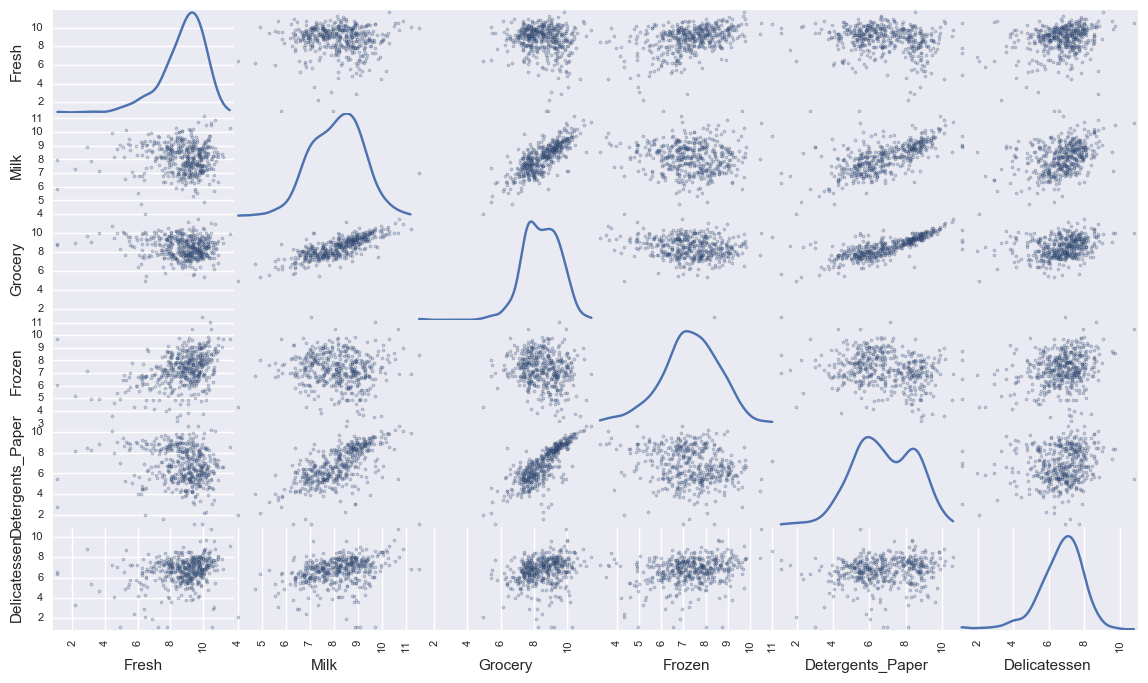

In [16]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [17]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
2,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [18]:
# For each feature find the data points with extreme high or low values
all_outliers = np.array([], dtype='int64')
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    outlier_points = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    all_outliers = np.append(all_outliers, outlier_points.index.values.astype('int64'))
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove

all_outliers, indices = np.unique(all_outliers, return_inverse=True)
counts = np.bincount(indices)
outliers  = all_outliers[counts>1]

print "Outliers Found\n",outliers


# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers Found
[ 65  66  75 128 154]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

We see several data points that are outliers for individual features. But these data points
[ 65  66  75 128 154] are outliers in more than one feature.

Data point 65 appear as outliers in both Fresh and Frozen.
Data point 66 appear as outliers in both Fresh and Deli.
Data point 75 appears as an outlier under the grocery feature section and the Detergents_Paper feature. 
Similarly data point 128 appears in Fresh and Deli. 
Similarly data point 154 appears in Milk and Grocery. 

Based on these data points we could remove data points 65, 66, 75 127 and 154 owing to the correlation of data between grocery and Detergents_paper and also between milk and grocery. The removal of just these these points would not alter our results.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.


Explanined Variance

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

Cumulative Variance
 
             Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4430  0.1675 -0.4014  -0.4381  0.1782   
Dimension 2              0.7068 -0.5184 -0.5686  -0.5088 -0.3223   
Dimension 3              0.8299 -1.1958 -0.5284  -0.5283 -0.0073   
Dimension 4              0.9311 -1.4001 -0.5156  -0.4726  0.7781   
Dimension 5              0.9796 -1.4027  0.2036  -0.1172  0.7450   
Dimension 6              1.0000 -1.3735 -0.3366   0.7033  0.7655   

             Detergents_Paper  Delicatessen  
Dimension 1           -0.7514       -0.1499  
Dimension 2           -0.7938       -0.6440  
Dimension 3           -1.0055       -0.0154  
Dimension 4           -0.7959       -0.5577  
Dimension 5           -1.3541       -0.7669  
Dimension 6           -1.5365

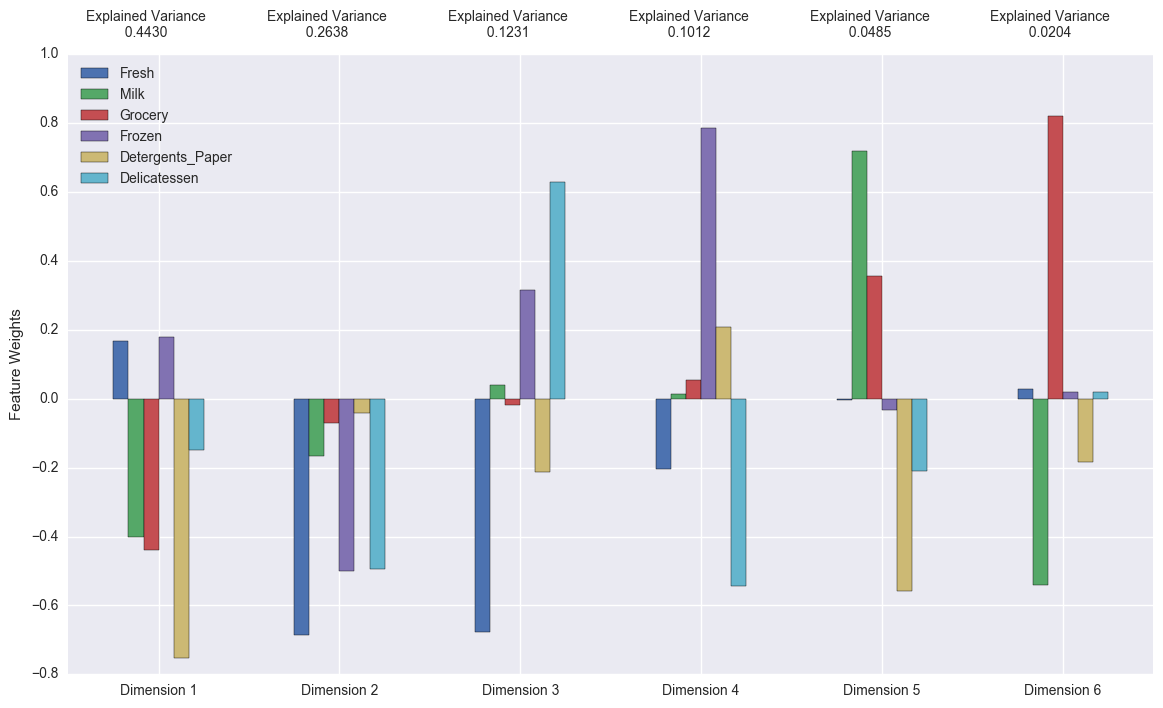

In [19]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)
# display cumulative variance:
print "\nExplanined Variance\n"
print pca_results['Explained Variance'].cumsum()
print "\nCumulative Variance\n "
print pca_results.cumsum()

In [20]:
pc_components = pd.DataFrame(pca.components_).T
pca_names = ['PC-{}'.format(x) for x in xrange(1, 7)]
pc_components.columns = pca_names
pc_components.insert(0, 'Features', data.columns)

print pc_components
pca_var_explained = pd.DataFrame({'Explained Variance Ratio': pca.explained_variance_ratio_})

pca_var_explained.insert(0, 'PCA', pca_names)
pca_var_explained['Explained Variance Percent'] = pca_var_explained['Explained Variance Ratio'].apply(round, args=[3]).apply(lambda x: x*100)
pca_var_explained


           Features      PC-1      PC-2      PC-3      PC-4      PC-5  \
0             Fresh  0.167464 -0.685935 -0.677389 -0.204293 -0.002614   
1              Milk -0.401439 -0.167228  0.040205  0.012811  0.719238   
2           Grocery -0.438111 -0.070729 -0.019533  0.055676  0.355386   
3            Frozen  0.178210 -0.500542  0.315043  0.785449 -0.033086   
4  Detergents_Paper -0.751426 -0.042444 -0.211702  0.209614 -0.558154   
5      Delicatessen -0.149871 -0.494147  0.628551 -0.542340 -0.209186   

       PC-6  
0  0.029156  
1 -0.540183  
2  0.820533  
3  0.020541  
4 -0.182388  
5  0.019748  


,PCA,Explained Variance Ratio,Explained Variance Percent
0,PC-1,0.443025,44.3
1,PC-2,0.263792,26.4
2,PC-3,0.123064,12.3
3,PC-4,0.101209,10.1
4,PC-5,0.048502,4.9
5,PC-6,0.020408,2.0


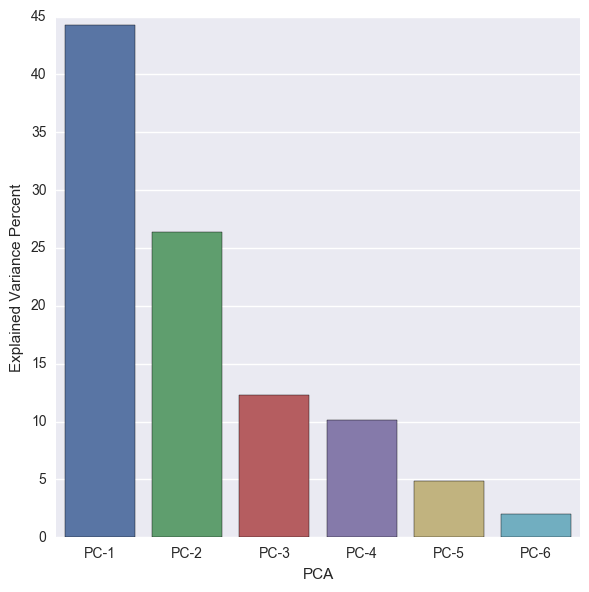

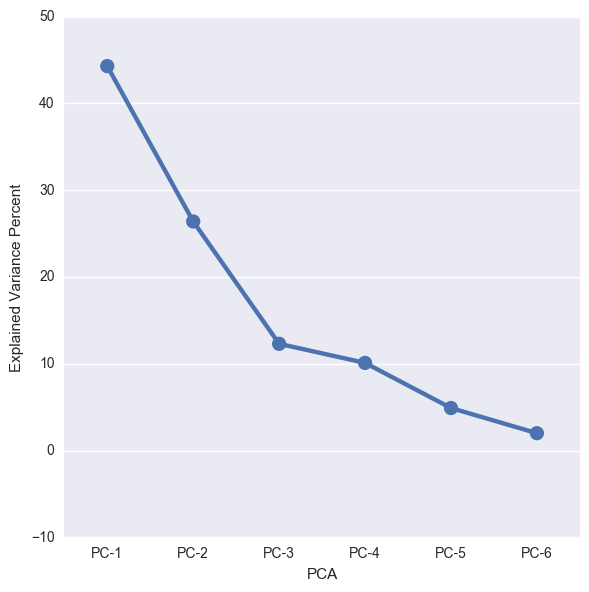

In [21]:

g=sns.factorplot(x='PCA',y='Explained Variance Percent', data=pca_var_explained, kind='bar',size=6, legend=True)
g=sns.factorplot(x='PCA',y='Explained Variance Percent',data=pca_var_explained, size=6)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The first pricipal component is at 44% which means that it contains 44% of the variance of the consumer segement dataset. The second principal component has variance ratio 27% of the data.

71% of all variance in the data is accounted for in the first and second principle component.

The principal compenent than drops to 11%, 9.6%, 4.6% and 2.3%.

If the third and the fourth component is included along with the first and second component, the 4 principle components account for 93% variance in the data set.

The first PCA component is influenced by Detergents, Milk and Grocery.

The second PCA component is influenced by Fresh, Frozen and Deli and less influenced by Detergents, Milk and Grocery, indicating that it is orthogonal to the first PCA component.

The third PCA component is influenced by Frozen and Deli, with the Fresh produce having an opposite effect on the component.

Similarly fourth PCA component is heavily influenced by Frozen and Detergents, with Fresh and Deli having an opposite effect.

Based on these finidings and plotting the "PCA Componenets" vs "Explained Variance we could justify how many componens to be considered for our analysis.

As seen from the line plot we see a formation of an elbow right after PC-3. 
This elbow region can be considered to be a a good cutoff region in considering the number dimensions we need for our analysis. In our analysis we would consider PC-1, PC-2, PC-3 and PC-4 dimensions as they capture about 93% of the variance in data set.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [22]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7887,-0.8123,0.2315,-0.0036,0.1194,-0.2106
1,-1.8834,-1.5991,1.3204,-0.5432,-0.3934,-0.3117
2,1.1553,-1.4052,0.5422,0.4127,-0.6865,0.6409


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [23]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)


# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [24]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7887,-0.8123
1,-1.8834,-1.5991
2,1.1553,-1.4052


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
### K-Means
K-means clustering is an unsupervised machine learning algorithm. The goal of k-means is to cluster or partition observations into k clusters. The observations in each cluster have similar characteristics or feature vectors to each other. 
Based on the number of clusters we need we initally choose a cluster centroid.
We then assign the observations to each of the clusters based on the minimum distance between each observation and the cluster centroid.
Below are the steps for K-means Algorithms

Step 1: Initialize cluster centers
Step 2:Assign observations to closest cluster center
Step 3:Revise cluster centers as a mean of assigned observations
Step 4:Repeat Step 1 and 2 untill convergence.

### Gaussian Mixture Models

Gaussina Mixture Models is also an unsupervised ML algorithm. The goal here also is to cluster observations into K-clusters. 
Gaussian Mixture Model is a probabilistic model. The model assumes all the observations are generated from a mixutre of Gaussian distributions. The observations will have mean and variance for each cluster.

Expectation Maximization (EM) algorithm is used to estimate the cluster responsibilities or assignments given the current paramater estimates and this is refered as the E-Step.

Maximizing likelihood over the parameters give current reponsibilities or current assignments and this is called hte M-step.


### K-Means VS Gaussian Mixture Models

#### K-Means Advantages
K-Means is a fast algorithm for clustering. This is faster then algoritms asuch as the Gaussian Mixture Models.
It is a very simple algorithm to implement and understand.


#### K-Means Disadvantages
K-Means algorithm can get stuck at local minima.
It is not a robust algorithm. It can have difficultities with outliers and when the shape of the clusters are close to spherical shapes.
K-Means  

#### Gaussian Mixture Models Advantages

Fast Algorithm
The algorithm does not bias cluster sizes to a have specific structures which means cluster assignment is more flexible in Gaussian Mixture Models as compared to the K-means algorithm.
In GMM observations can be assigned to different clusters. This is based on the probability of the observation that is generated from each cluster's normal distribution.

#### Gaussian Mixture Models Disadvantages
Algorithm diverges and finds solutions with infnite likelihood values due to the difficulty in estimating the covariance matrices, when we have insufficiently many observation points per cluster.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [25]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])

    
#"""    
clusterer = KMeans(n_clusters=2, random_state=50).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(reduced_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')
#"""
print ("KMeans Clustering Score:%0.4f "%score)

KMeans Clustering Score:0.4263 


In [26]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
reduced_samples = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])
clusters=[2,3,4,5,6,7,8,9,10]
score_kmeans={}
for cluster in clusters:
    
#"""    
    clusterer = KMeans(n_clusters=cluster, random_state=50).fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds_KM = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
    centers_KM = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds_KM = clusterer.predict(reduced_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score_kmeans[cluster] = silhouette_score(reduced_data, clusterer.labels_, metric='euclidean')
#"""
print ("KMeans Clustering Score for Different Number of Clusters:")
score_kmeans

KMeans Clustering Score for Different Number of Clusters:


{2: 0.42628101546910835,
 3: 0.39689092644980506,
 4: 0.33119558416124728,
 5: 0.35220887435264298,
 6: 0.36551710525876341,
 7: 0.36396157294051729,
 8: 0.35333163144273211,
 9: 0.34092409017426611,
 10: 0.36290159247575576}

In [27]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

clusterer = GaussianMixture(n_components=2,covariance_type='tied').fit(reduced_data)

# TODO: Predict the cluster for each data point
preds_GMM = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers_GMM = clusterer.covariances_

# TODO: Predict the cluster for each transformed sample data point
clusterer_log = GaussianMixture(n_components=2).fit(log_data)
sample_preds_GMM = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score_GMM = silhouette_score(reduced_data, preds)
#"""
print ("GMM Clustering Score:%0.4f "%score_GMM)

GMM Clustering Score:0.4263 


In [28]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

clusters=[2,3,4,5,6,7,8,9,10]
scoreList_GMM={}
centersGMM={}
clustererGMM={}
predsGMM={}
for n in clusters:
    
    clustererGMM[n] = GaussianMixture(n_components=n,covariance_type='tied').fit(reduced_data)
    
    predsGMM[n] = clustererGMM[n].predict(reduced_data)# TODO: Predict the cluster for each data point
    centersGMM[n] = clustererGMM[n].covariances_ #Find the cluster centers
    sample_predsGMM = clustererGMM[n].predict(pca_samples) #Predict the cluster for each transformed sample data point
    scoreList_GMM[n]=(silhouette_score(reduced_data, predsGMM[n])) #Calculate the mean silhouette coefficient for the number of clusters chosen
    


In [29]:
scoreList_GMM

{2: 0.42324767684492126,
 3: 0.38317000932810563,
 4: 0.32042523096778597,
 5: 0.31063354652295211,
 6: 0.28115429544107207,
 7: 0.32035256769689185,
 8: 0.3464417629015667,
 9: 0.30424184848899527,
 10: 0.32836385448180966}

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
The silhouette score for cluster=2 gives the best score. I choose the score for cluster 2 as both Kmeans and Gaussian Mixture gave consistent scores for cluster=2


In [30]:
print "The best silhouette score using Kmeans: %0.4f"%score_kmeans[2]
print "The best silhouette score using Gaussian Mixture: %0.4f"%scoreList_GMM[2]

The best silhouette score using Kmeans: 0.4263
The best silhouette score using Gaussian Mixture: 0.4232


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

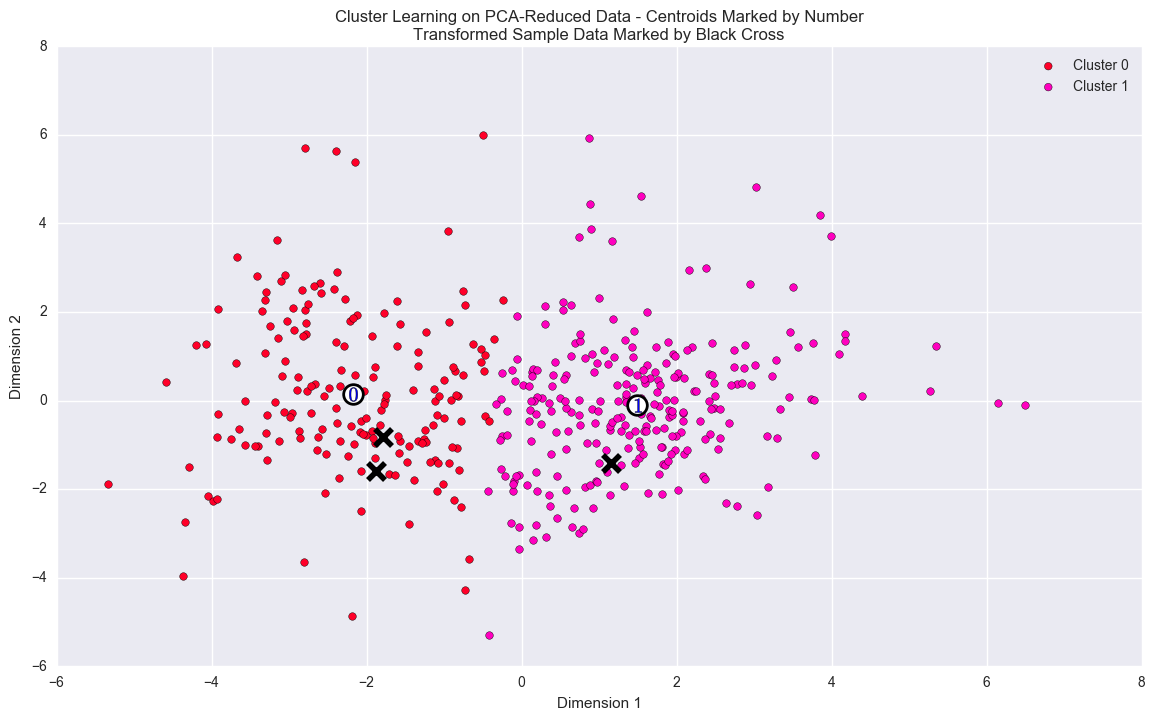

In [31]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [32]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


In [33]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
In segment 1 we see a lot of purchases in Fresh Produce and Frozen products. Some grocery purchases can also be noted. Purchase of milk and detergents are low comparitively.

In segment 0 we see dominant purchases of Milk, Grocery, Detergents and Deli. There are some purchases of Fresh and Frozen but they are relatively low compared to Milk, Grocery and Detergents.

By looking at this pattern of purchase and comparing it to the statistics of the data, we see that segment 1 has high purchasers in fresh produce and frozen products as the values of these products are above the median (50%). The value of grocery we obtained is about the value of the median value.

Similarly we see that for segment 0 Milk, Grocery, Detergents and Deli are above the median.

As we have divided our data set into two clusters we can similarly divide the wholesale customers into two groups. 

One group of customers that is segment 1 who heavily purchase Fresh and Frozen products and to a certain extent grocery. This group of wholesale customers can be identified as small coffee shops, restaurants or fast food chains to cater to their respective daily customers. 

The other group belonging to segment 0 are probably wholesale customers who buy Milk, Grocery, Detergensts and Deli.
This group of customers could be supermarkets and grocery stores who would buy a lot of milk, deli products, grocery and detergents.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [36]:
pca_samples

array([[-1.7886645 , -0.81225054],
       [-1.8833535 , -1.59913512],
       [ 1.15526467, -1.40520087]])

In [34]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**
Based on the sample points provided we see that the sample point 0 and sample point 1 are in cluster 0 and this is consistent in our visulization also where it does show the two points under cluster 0. So these two sample points could be representing supermarket or big grocery store.
Similarly sample point 2 is shown in cluster 1 which is consistent with what we see in our prediction. This is predicted as coffee shop or a restaurant.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
Based on the predictions we have made we can conclude that we could change the delivery services from 5 days to 3 days a week to the segment 0 customers or the supermarket grocery customers.
But we cannot do the same to the segment 1 customers as these are customers who are large in number but their volume requirement is lesser as compared to the segment 0 customers.
This conclusion is based on just perfomring the clustering analysis.
In order to come up with a scientific study using an A/B test would be appropriate.
In this test we would select statistically significant sample from each cluster and use the remaining customers of their clusters as control group. We could than apply the 3 day delivery schedule to the sample of customers as a pilot project and get a feedback from these sample customers and compare that with the control groups. This would help us in determining how the chage in delivery schedules would affect the customers and if we need to keep different delivery schedules to different sement of the customers.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
The cluster assignment that we do for each of the customers can be used as the target feature variable. Once we have defined this target feature we could use supervised learning classifiers on this new data set.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

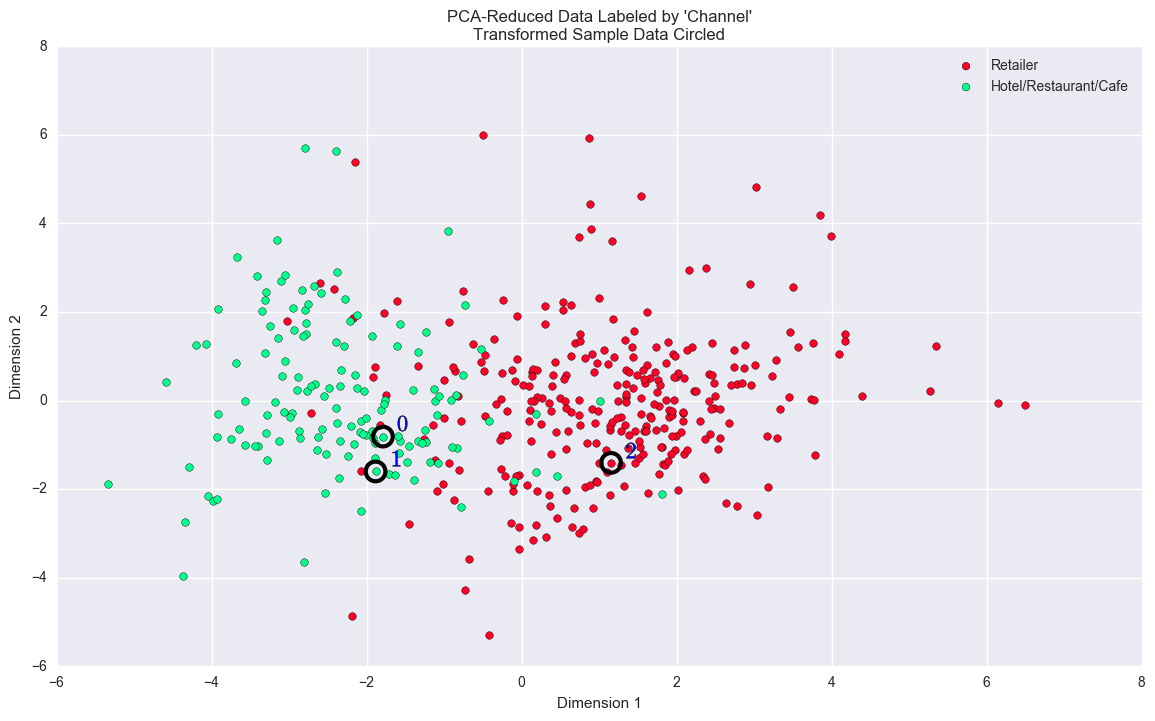

In [35]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
Looking at the distribution we can conclude that the number of clusters choosen (2) matches well with the underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers.
We do see some of the data points bleed into the clusters. 

But we can clearly see that segment 0 is clearly the "Retail" sector and segment 1 being the "Hotel/Restaurant/Cafe". The algorithm implemented by us for the clustering analysis does a good job of clustering customers into categories based on their buisness models.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.